# Gap junction coupled neurons driven by synaptic input

When a network is driven by continuous current injections each neuron receives a steady depolarisation, however when instead driven by more natural synaptic input, the neurons receive random input. Here the gap junctions are less able to synchronise the input.

This uses the same striatal network as before [FS_network_3.ipynb](FS_network_3.ipynb) but this time it is driven by synaptic input.

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

network_path = os.path.join("FS_network_4-synaptic")

In [ ]:
# This should be 100 neurons to match previous run, setting it to 10 FS for speed while developing

from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=10, num_LTS=0, num_ChIN=0,
                    volume_type="cube", side_len=230e-6)
cnc.write_json()

In [ ]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

In [ ]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

In [ ]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

In [ ]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file="example-FS-input.json",
                 verbose=False)
si.generate()

In [ ]:
!mpiexec -n 2 snudda simulate FS_network_4-synaptic --time 1 --outputFile FS_network_4-synaptic/simulation/output-no-gj.hdf5

Loading FS_network_4-synaptic/simulation/output-no-gj.hdf5


TypeError: object of type 'NoneType' has no len()

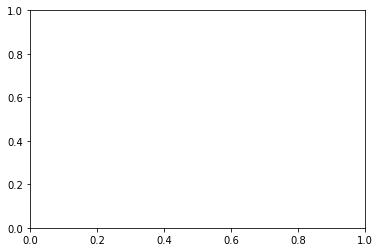

In [2]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-gj.hdf5"))
pcc.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj.png"))